# NumPy  SciPy

In [1]:
import numpy as np

## Задание 1 ★★☆

Разбейте массив на убывающие подмассивы.  
Подсказка: np.diff()  
Используйте библиотеку `numpy`, не используйте циклы.

In [2]:
def function_1(arr):
    return np.split(arr, np.where(np.diff(arr) >= 0)[0] + 1)

Пояснения

In [3]:
arr = [3, 2, 1, 4, 5, 2, 0, 2, 2, 4, 1]

np.diff(arr) возвращает массив, элемент которого - это разница между следующим и предыдущим элементом arr:

In [4]:
np.diff(arr)

array([-1, -1,  3,  1, -3, -2,  2,  0,  2, -3])

Если все значения отрицательные значит массив убывает. Найдем позицию элементов, на которых заканчивается убывающая последовательность с помощью `np.diff`:

In [5]:
np.where(np.diff(arr) >= 0)[0]

array([2, 3, 6, 7, 8])

Теперь просто разделим массив по элементам следующим за найденными с помощью `np.split`:

In [6]:
np.split(arr, np.where(np.diff(arr) >= 0)[0] + 1)

[array([3, 2, 1]),
 array([4]),
 array([5, 2, 0]),
 array([2]),
 array([2]),
 array([4, 1])]

Проверка

In [7]:
function_1([3, 2, 1, 4, 5, 2, 0, 2, 4, 1])

[array([3, 2, 1]), array([4]), array([5, 2, 0]), array([2]), array([4, 1])]

In [8]:
len(function_1([3, 2, 1, 4, 5, 2, 0, 2, 4, 1])) == 5

True

In [9]:
np.random.seed(42)
len(function_1(np.random.randint(-10, 10, size=20))) == 9

True

In [10]:
np.random.seed(42)
len(function_1(np.random.randint(-10, 100, size=10))) == 4

True

Значение для формы

In [11]:
np.random.seed(21)
a = np.random.uniform(0, 3000, size=1000)
print(len(function_1(a)))

505


## Задание 2 ★★☆

Дан массив arr, необходимо найти среднее значение внутри групп, группа определена массивом g. Например, для  
`arr = [4, 2, 1, 5, 2, 5, 1, 3]` и   
`g =   [0, 1, 1, 0, 1, 0, 1, 0]` (4 относится к группе 0, 2 к группе 1 и т. д.)   
Средние по группам: `[4.25, 1.5]`  
Подсказка: `np.bincount()`   
Используйте библиотеку `numpy`, не используйте циклы.

In [12]:
def function_2(arr, g):
    return np.bincount(g, weights=arr) / np.bincount(g)

Проверочный код

In [13]:
all(function_2(np.array([4, 2, 1, 5, 2, 5, 1, 3]), np.array([0, 1, 1, 0, 1, 0, 1, 0])) == [4.25, 1.5])

True

In [14]:
np.random.seed(42)
all(function_2(np.random.randint(0, 25, size=10), np.random.randint(0, 3, size=10)) == [12., 15.2, 10.])

True

In [15]:
np.random.seed(42)
all(function_2(np.random.randint(0, 100, size=10), np.random.randint(0, 4, size=10)) == [89., 78., 20., 54.])

True

Значение для формы

In [16]:
np.random.seed(21)
a = np.random.uniform(0, 3000, size=1000)
g = np.random.randint(0, 20, 1000)
print(np.round(function_2(a, g).sum(), 4))

30021.8043


## Задание 3 ★★★

Предположим нам даны две выборки-матрицы: обучающая X_train (размер l1 x n) и тестовая X_test (размер l2 x n), каждая строка в матрице - это вектор, описывающий объект в n-мерном пространстве. Допустим, что в ходе некоторой задачи потребовалось вычислить расстояние между векторами из тестовой и обучающей выборки. То есть для каждой строки-вектора из тестовой выборки нужно найти расстояние до каждого вектора из обучающей, таким образом мы получим матрицу dist размера l1 x l2.   

В этом задании необходимо получить матрицу расстояний dist, **не используя циклы**.
Для начала, попробуйте это сделать через два цикла и сравните эффективность с конечной реализацией через numpy.  

Пояснение

Пусть даны две матрицы:  

  
$X_{train} = \begin{pmatrix}
a_{11}&a_{12}&\cdots &a_{1n}\\a_{21}&a_{22}&\cdots &a_{2p}\\
\vdots &\vdots &\ddots &\vdots \\
a_{n1}&a_{n2}&\cdots &a_{np}
\end{pmatrix} =
\begin{pmatrix}
a_{1}\\
\vdots \\
a_{n}
\end{pmatrix}
\ \
X_{test} = \begin{pmatrix}
b_{11}&b_{12}&\cdots &b_{1n}\\b_{21}&b_{22}&\cdots &b_{2p}\\
\vdots &\vdots &\ddots &\vdots \\
b_{m1}&b_{m2}&\cdots &b_{mp}
\end{pmatrix}
=
\begin{pmatrix}
b_{1}\\
\vdots \\
b_{n}
\end{pmatrix}
$  
  
  
Здесь   
$a_i$ - вектор-строка матрицы $X_{train}$ из $p$ компонент, $i$ от 1 до n  
$b_k$ - вектор-строка матрицы $X_{test}$ из $p$ компонент, $k$ от 1 до m

Тогда требуемая матрица  
  
$$
dist = 
\begin{pmatrix}
d_{11}&d_{12}&\cdots &d_{1m}\\d_{21}&d_{22}&\cdots &d_{2m}\\
\vdots &\vdots &\ddots &\vdots \\
d_{n1}&d_{n2}&\cdots &d_{nm}
\end{pmatrix} 
$$  
  
Где  
$d_{ik}$ - расстояние от $a_i$ до $b_k$  
$d_{ik} = |a_i - b_k| = \sqrt{(a_{i1} - b_{k1})^2 + \dots + (a_{ij} - b_{kj})^2  + \dots (a_{ip} - b_{kp})^2 }$
   
Раскроем скобки:  

$d_{ik}= \sqrt{a_{i1}^2 - 2 a_{i1}b_{k1} + b_{k1}^2 + \dots + a_{ij}^2 - 2 a_{ij}b_{kj} +  b_{kj}^2  + \dots + a_{ip}^2 - 2 a_{ip}b_{kp} + b_{kp}^2 }$  
Сгруппируем

$d_{ik}= \sqrt{(a_{i1}^2 + \dots + a_{ij}^2 + \dots+ a_{ip}^2) - 2 (a_{i1}b_{k1} + \dots  + a_{ij}b_{kj} + \dots + a_{ip}b_{kp})+ (b_{k1}^2 + \dots + b_{kj}^2  \dots + b_{kp}^2) }$

$$d_{ik}= \sqrt{\sum_{j=1}^p{a_{ij}^2} - 2 \langle a_i, b_k\rangle + \sum_{j=1}^p{b_{kj}^2} }$$

$$dist^2 = 
\begin{pmatrix}
\sum_{j=1}^p{a_{1j}^2}\\
\vdots \\
\sum_{j=1}^p{a_{nj}^2}
\end{pmatrix} 
 -2
\begin{pmatrix}
\langle a_1, b_1\rangle&\langle a_1, b_2\rangle&\cdots &\langle a_1, b_m\rangle\\
\langle a_2, b_1\rangle&\langle a_2, b_2\rangle&\cdots &\langle a_2, b_m\rangle\\
\vdots &\vdots &\ddots &\vdots \\
\langle a_n, b_1\rangle&\langle a_n, b_2\rangle&\cdots &\langle a_n, b_m\rangle\\
\end{pmatrix}
+
\begin{pmatrix}
\sum_{j=1}^p{b_{1j}^2}\\
\vdots \\
\sum_{j=1}^p{b_{nj}^2}
\end{pmatrix}^T
$$

In [17]:
def function_3(X_train, X_test):
    dists = np.sum(X_test**2, axis=1)[:,np.newaxis] - 2* (X_test @ X_train.T) + np.sum(X_train**2, axis=1)
    return np.sqrt(dists)

Значение для формы

In [18]:
%%time
np.random.seed(42)
X_train, X_test = np.random.rand(60000, 3000), np.random.rand(1000, 3000)
dist = function_3(X_train, X_test)
print(np.round(dist.sum(), 4))

1341747083.8534
CPU times: user 56.6 s, sys: 3.82 s, total: 1min
Wall time: 19.8 s


## Задание 4 ★☆☆

Реализуйте функцию вычисляющую приближенную матрицу $X_k$  для матрицы $X$ заданного ранга $k$ по норме Фробениуса.   
Подсказка:   
см. семнар SciPy  
scipy.linalg.svd  

In [19]:
from scipy.linalg import svd
import scipy

In [20]:
def function_4(X, k):
    u, s, v = svd(X)
    return u[:,:k] @ np.diag(s[:k]) @ v[:k,:]

Проверка

In [21]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(4, 5))
X_k = function_4(X, 3)
(scipy.linalg.norm(X - X_k) < 2 and np.linalg.matrix_rank(X_k) == 3)

True

In [22]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(4, 5))
X_k = function_4(X, 4)
(scipy.linalg.norm(X - X_k) < 1e-10 and np.linalg.matrix_rank(X_k) == 4)

True

Значение для формы

In [23]:
np.random.seed(42)
X = np.random.randint(0, 10, size=(100, 150))
X_k = function_4(X, 40)
print(np.round(scipy.linalg.norm(X - X_k), 3) * np.linalg.matrix_rank(X_k))

7279.84


## Задание 5 ★★☆

Найдите тангенс угла наклона прямой, такой что максимальное расстояние от точек $X$ до прямой минимально. Cчитайте, что прямая проходит через начало координат.

In [24]:
from sklearn.datasets import load_breast_cancer
from scipy import optimize 

data = load_breast_cancer()
X = data.data[:, :2]

In [25]:
def function_5(points):
    # TODO
    def distination(k, point):
        x = point[:, 0]
        y = point[:, 1]
        tmp = (x + k * y) / (k ** 2 + 1)
        return (tmp - x) ** 2 + (k * tmp - y) ** 2
    
    return optimize.minimize(lambda x: distination(x, X).max(), x0=1)['x'][0]

Значение для формы

In [26]:
print(round(function_5(X), 3))

1.329


Визуализация

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
k = function_5(X)

In [29]:
x = np.linspace(0, 30, 100)

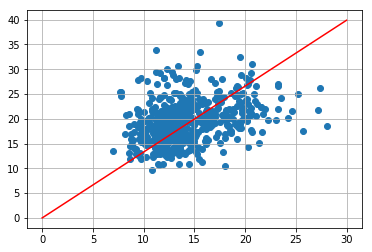

In [30]:
plt.scatter(X[:, 0], X[:, 1]);
plt.plot(x, k * x, color='r')
plt.grid(True)